In [716]:
 #Para la implementación de algoritmos de machine learning, como la regresión, clasificación.
#!pip install scikit-learn 
# Para crear gráficos estadísticos de manera sencilla y visualmente atractiva.
#!pip install seaborn 
# Para crear gráficos estáticos, visualizaciones de datos y gráficos de todo tipo.
#!pip install matplotlib 

In [717]:
import pandas as pd # Importacion de diferentes librerias"librería pandas, que se usa para manejar estructuras de datos como DataFrames y Series.
import numpy as np # Importa la librería NumPy, que se usa para trabajar con arrays multidimensionales y realizar cálculos matemáticos avanzados.
import seaborn as sns # Importa Seaborn, que se usa para crear visualizaciones estadísticas y gráficos más complejos que los de Matplotlib.
import matplotlib.pyplot as plt # Importa Matplotlib, que se usa para crear gráficos estáticos, como gráficos de barras, líneas, dispersión, etc.
import warnings # Importa el módulo 'warnings', que se usa para manejar advertencias.
from sklearn.impute import IterativeImputer # Importa la clase IterativeImputer de Scikit-learn, que se usa para imputar valores nulos en un conjunto de datos mediante un modelo iterativo.

In [718]:
#Configura la opción de visualización para mostrar todas las columnas del DataFrame, sin limitaciones.
pd.set_option('display.max_columns', None)

In [719]:
 #Ignora las advertencias de tipo FutureWarning.
warnings.simplefilter(action='ignore', category=FutureWarning)

In [720]:
#Cargar el archivo CSV "datos_salud_habitos.csv" en un DataFrame llamado 'df'.
df = pd.read_csv("datos_salud_habitos.csv", index_col=0) # La primera columna del archivo será utilizada como índice (en lugar de generar una automáticamente).
df

,Edad,Genero,IMC,Nivel_Actividad,Consumo_Alcohol,Fumador,Presion_Sistolica,Presion_Diastolica,Colesterol,Glucosa,Horas_Sueno,Pasos_Diarios,Satisfaccion_Vida,Enfermedad_Cronica
ID,,,,,,,,,,,,,,
1.0,56.0,Femenino,37.10,Alto,Nunca,No,157.0,82.0,Muy Alto,110.3,NaN,NaN,8.0,NaN
2.0,69.0,Femenino,22.53,Moderado,Ocasional,No,167.0,69.0,Muy Alto,81.2,NaN,NaN,9.0,No
3.0,46.0,Femenino,20.46,Bajo,Frecuente,NaN,167.0,NaN,Normal,81.8,9.8,6079.0,NaN,No
4.0,32.0,Otro,23.93,Moderado,Nunca,No,105.0,111.0,Alto,190.0,8.2,15341.0,8.0,Sí
NaN,60.0,Femenino,19.26,Bajo,Frecuente,No,160.0,84.0,NaN,159.6,4.4,10981.0,6.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196.0,78.0,Masculino,18.00,NaN,Ocasional,No,155.0,68.0,Muy Alto,112.8,8.8,8240.0,8.0,Sí
1197.0,69.0,Masculino,29.24,Alto,Nunca,NaN,114.0,115.0,Normal,146.4,9.4,5942.0,1.0,Sí
1198.0,32.0,Masculino,NaN,Bajo,Ocasional,No,162.0,82.0,Muy Alto,180.1,7.7,14536.0,5.0,No


In [721]:
# Mostrar número de filas y columnas.
df.shape

(1200, 14)

In [722]:
#Muestra los nombres de las columnas
df.columns

Index(['Edad', 'Genero', 'IMC', 'Nivel_Actividad', 'Consumo_Alcohol',
       'Fumador', 'Presion_Sistolica', 'Presion_Diastolica', 'Colesterol',
       'Glucosa', 'Horas_Sueno', 'Pasos_Diarios', 'Satisfaccion_Vida',
       'Enfermedad_Cronica'],
      dtype='object')

In [723]:
# Genera un resumen estadístico de las columnas categóricas del DataFrame.
df.describe(include='object').T

,count,unique,top,freq
Genero,1080,3,Masculino,365
Nivel_Actividad,1080,3,Bajo,383
Consumo_Alcohol,1080,3,Frecuente,387
Fumador,1080,2,Sí,562
Colesterol,1080,3,Normal,381
Enfermedad_Cronica,1080,2,Sí,543


In [724]:
# Genera un resumen estadístico de las columnas numéricas del DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,1080.0,49.597222,18.087774,18.0,34.000,50.00,66.0000,79.00
IMC,1080.0,29.179704,6.297420,18.0,23.995,29.26,34.6125,39.99
Presion_Sistolica,1080.0,135.182407,26.141929,90.0,112.000,136.00,158.0000,179.00
Presion_Diastolica,1080.0,89.352778,17.043057,60.0,75.000,89.00,104.0000,119.00
Glucosa,1080.0,132.714352,37.128472,70.1,100.400,132.45,162.8250,199.90
Horas_Sueno,1080.0,7.005278,1.669477,4.0,5.600,7.00,8.4000,10.00
Pasos_Diarios,1080.0,10583.525000,5576.661805,1005.0,5720.250,10471.00,15612.7500,19982.00
Satisfaccion_Vida,1080.0,4.935185,2.542587,1.0,3.000,5.00,7.0000,9.00


In [725]:
# Muestra el tipo de dato de cada columna.
df.dtypes

Edad                  float64
Genero                 object
IMC                   float64
Nivel_Actividad        object
Consumo_Alcohol        object
Fumador                object
Presion_Sistolica     float64
Presion_Diastolica    float64
Colesterol             object
Glucosa               float64
Horas_Sueno           float64
Pasos_Diarios         float64
Satisfaccion_Vida     float64
Enfermedad_Cronica     object
dtype: object

In [726]:
# Muestra la cantidad de veces que aparece cada tipo de dato en las columnas.
df.dtypes.value_counts()

float64    8
object     6
Name: count, dtype: int64

In [727]:
print=df.isnull().sum()[df.isnull().sum() > 0]


In [728]:
# Calcula el porcentaje de valores nulos en cada columna del DataFrame y ordena las columnas por el porcentaje de nulos de mayor a menor.
nulos = df.isnull().sum() / df.shape[0] * 100 # Calcula el porcentaje de nulos por columna.
nulos.sort_values(ascending=False) # Ordena los valores de nulos de mayor a menor.

Edad                  10.0
Genero                10.0
IMC                   10.0
Nivel_Actividad       10.0
Consumo_Alcohol       10.0
Fumador               10.0
Presion_Sistolica     10.0
Presion_Diastolica    10.0
Colesterol            10.0
Glucosa               10.0
Horas_Sueno           10.0
Pasos_Diarios         10.0
Satisfaccion_Vida     10.0
Enfermedad_Cronica    10.0
dtype: float64

In [729]:
# Obtiene las columnas de tipo 'object' que contienen valores nulos en el DataFrame.
df[df.columns[df.isnull().any()]].select_dtypes(include="O").columns

Index(['Genero', 'Nivel_Actividad', 'Consumo_Alcohol', 'Fumador', 'Colesterol',
       'Enfermedad_Cronica'],
      dtype='object')

In [730]:
#Se rellenan valores nulos en columnas númericas, utilizanddo la media
df["IMC"].fillna(df["IMC"].mean(), inplace=True)
df["Edad"].fillna(df["Edad"].mean(), inplace=True)
df["Presion_Sistolica"].fillna(df["Presion_Sistolica"].mean(), inplace=True)
df['Presion_Diastolica'].fillna(df['Presion_Diastolica'].mean(), inplace=True)
df['Glucosa'].fillna(df['Glucosa'].mean(), inplace=True)
df['Horas_Sueno'].fillna(df['Horas_Sueno'].mean(), inplace=True)
df['Pasos_Diarios'].fillna(df['Pasos_Diarios'].mean(), inplace=True)
df['Satisfaccion_Vida'].fillna(df['Satisfaccion_Vida'].mean(), inplace=True)

In [731]:
# Rellenan datos nulos en columnas categoricas, utilizando la moda 
df["Genero"].fillna(df["Genero"].mode()[0], inplace=True)
df["Nivel_Actividad"].fillna(df["Nivel_Actividad"].mode()[0], inplace=True)
df["Consumo_Alcohol"].fillna(df["Consumo_Alcohol"].mode()[0], inplace=True)
df["Fumador"].fillna(df["Fumador"].mode()[0], inplace=True)
df["Colesterol"].fillna(df["Colesterol"].mode()[0], inplace=True)
df["Enfermedad_Cronica"].fillna(df["Enfermedad_Cronica"].mode()[0], inplace=True)

In [732]:
df

,Edad,Genero,IMC,Nivel_Actividad,Consumo_Alcohol,Fumador,Presion_Sistolica,Presion_Diastolica,Colesterol,Glucosa,Horas_Sueno,Pasos_Diarios,Satisfaccion_Vida,Enfermedad_Cronica
ID,,,,,,,,,,,,,,
1.0,56.0,Femenino,37.100000,Alto,Nunca,No,157.000000,82.000000,Muy Alto,110.300000,7.005278,10583.525,8.000000,Sí
2.0,69.0,Femenino,22.530000,Moderado,Ocasional,No,167.000000,69.000000,Muy Alto,81.200000,7.005278,10583.525,9.000000,No
3.0,46.0,Femenino,20.460000,Bajo,Frecuente,Sí,167.000000,89.352778,Normal,81.800000,9.800000,6079.000,4.935185,No
4.0,32.0,Otro,23.930000,Moderado,Nunca,No,105.000000,111.000000,Alto,190.000000,8.200000,15341.000,8.000000,Sí
NaN,60.0,Femenino,19.260000,Bajo,Frecuente,No,160.000000,84.000000,Normal,159.600000,4.400000,10981.000,6.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196.0,78.0,Masculino,18.000000,Bajo,Ocasional,No,155.000000,68.000000,Muy Alto,112.800000,8.800000,8240.000,8.000000,Sí
1197.0,69.0,Masculino,29.240000,Alto,Nunca,Sí,114.000000,115.000000,Normal,146.400000,9.400000,5942.000,1.000000,Sí
1198.0,32.0,Masculino,29.179704,Bajo,Ocasional,No,162.000000,82.000000,Muy Alto,180.100000,7.700000,14536.000,5.000000,No


In [733]:
# Cuenta y muestra el número de valores nulos por columna. Así se comprueba que el paso anterior esté correcto.
df.isnull().sum()

Edad                  0
Genero                0
IMC                   0
Nivel_Actividad       0
Consumo_Alcohol       0
Fumador               0
Presion_Sistolica     0
Presion_Diastolica    0
Colesterol            0
Glucosa               0
Horas_Sueno           0
Pasos_Diarios         0
Satisfaccion_Vida     0
Enfermedad_Cronica    0
dtype: int64

In [734]:
#Se cambian números float a enteros
df['Edad'] = df['Edad'].astype(int)
df['IMC'] = df['IMC'].astype(int)
df['Presion_Sistolica'] = df['Presion_Sistolica'].astype(int)
df['Presion_Diastolica'] = df['Presion_Diastolica'].astype(int)
df['Glucosa'] = df['Glucosa'].astype(int)
df['Horas_Sueno'] = df['Horas_Sueno'].astype(int)
df['Pasos_Diarios'] = df['Pasos_Diarios'].astype(int)
df['Satisfaccion_Vida'] = df['Satisfaccion_Vida'].astype(int)

In [735]:
df

,Edad,Genero,IMC,Nivel_Actividad,Consumo_Alcohol,Fumador,Presion_Sistolica,Presion_Diastolica,Colesterol,Glucosa,Horas_Sueno,Pasos_Diarios,Satisfaccion_Vida,Enfermedad_Cronica
ID,,,,,,,,,,,,,,
1.0,56,Femenino,37,Alto,Nunca,No,157,82,Muy Alto,110,7,10583,8,Sí
2.0,69,Femenino,22,Moderado,Ocasional,No,167,69,Muy Alto,81,7,10583,9,No
3.0,46,Femenino,20,Bajo,Frecuente,Sí,167,89,Normal,81,9,6079,4,No
4.0,32,Otro,23,Moderado,Nunca,No,105,111,Alto,190,8,15341,8,Sí
NaN,60,Femenino,19,Bajo,Frecuente,No,160,84,Normal,159,4,10981,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196.0,78,Masculino,18,Bajo,Ocasional,No,155,68,Muy Alto,112,8,8240,8,Sí
1197.0,69,Masculino,29,Alto,Nunca,Sí,114,115,Normal,146,9,5942,1,Sí
1198.0,32,Masculino,29,Bajo,Ocasional,No,162,82,Muy Alto,180,7,14536,5,No


In [736]:
#Elimiinar ID
df = df.iloc[1:].reset_index(drop=True)

In [737]:
#Se reinicia los índices del DataFrame después de eliminar la fila.
df = df.reset_index(drop=True)

In [738]:
df

,Edad,Genero,IMC,Nivel_Actividad,Consumo_Alcohol,Fumador,Presion_Sistolica,Presion_Diastolica,Colesterol,Glucosa,Horas_Sueno,Pasos_Diarios,Satisfaccion_Vida,Enfermedad_Cronica
0,69,Femenino,22,Moderado,Ocasional,No,167,69,Muy Alto,81,7,10583,9,No
1,46,Femenino,20,Bajo,Frecuente,Sí,167,89,Normal,81,9,6079,4,No
2,32,Otro,23,Moderado,Nunca,No,105,111,Alto,190,8,15341,8,Sí
3,60,Femenino,19,Bajo,Frecuente,No,160,84,Normal,159,4,10981,6,No
4,25,Masculino,29,Bajo,Frecuente,Sí,108,113,Normal,132,5,4524,6,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,78,Masculino,18,Bajo,Ocasional,No,155,68,Muy Alto,112,8,8240,8,Sí
1195,69,Masculino,29,Alto,Nunca,Sí,114,115,Normal,146,9,5942,1,Sí
1196,32,Masculino,29,Bajo,Ocasional,No,162,82,Muy Alto,180,7,14536,5,No
1197,64,Masculino,24,Alto,Nunca,No,116,94,Muy Alto,132,4,2600,4,No


In [739]:
# Elimina las columnas especificadas en 'columnas_eliminar' de manera permanente.
columnas_eliminar = ["Enfermedad_Cronica"] # Lista de columnas para eliminar.
df.drop(columnas_eliminar, axis=1, inplace=True) # Eliminación.

In [740]:
df

,Edad,Genero,IMC,Nivel_Actividad,Consumo_Alcohol,Fumador,Presion_Sistolica,Presion_Diastolica,Colesterol,Glucosa,Horas_Sueno,Pasos_Diarios,Satisfaccion_Vida
0,69,Femenino,22,Moderado,Ocasional,No,167,69,Muy Alto,81,7,10583,9
1,46,Femenino,20,Bajo,Frecuente,Sí,167,89,Normal,81,9,6079,4
2,32,Otro,23,Moderado,Nunca,No,105,111,Alto,190,8,15341,8
3,60,Femenino,19,Bajo,Frecuente,No,160,84,Normal,159,4,10981,6
4,25,Masculino,29,Bajo,Frecuente,Sí,108,113,Normal,132,5,4524,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,78,Masculino,18,Bajo,Ocasional,No,155,68,Muy Alto,112,8,8240,8
1195,69,Masculino,29,Alto,Nunca,Sí,114,115,Normal,146,9,5942,1
1196,32,Masculino,29,Bajo,Ocasional,No,162,82,Muy Alto,180,7,14536,5
1197,64,Masculino,24,Alto,Nunca,No,116,94,Muy Alto,132,4,2600,4


In [741]:
df.columns

Index(['Edad', 'Genero', 'IMC', 'Nivel_Actividad', 'Consumo_Alcohol',
       'Fumador', 'Presion_Sistolica', 'Presion_Diastolica', 'Colesterol',
       'Glucosa', 'Horas_Sueno', 'Pasos_Diarios', 'Satisfaccion_Vida'],
      dtype='object')

In [742]:
#Verificar que la columna 'IMC' existe
print(df['IMC'].describe())  # Descripción estadística del IMC

TypeError: 'Series' object is not callable

# Distribución del Índice de Masa Corporal en la Población

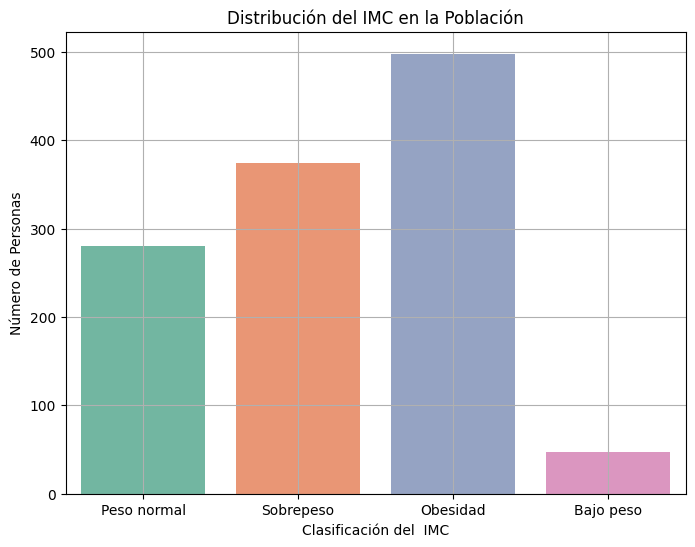

In [ ]:
# Clasificar el IMC en categorías
def clasificar_imc(imc):
    if imc < 18.5:
        return 'Bajo peso'
    elif 18.5 <= imc < 24.9:
        return 'Peso normal'
    elif 25 <= imc < 29.9:
        return 'Sobrepeso'
    else:
        return 'Obesidad'

# Aplicar la función al dataset
df['Categoria IMC'] = df['IMC'].apply(clasificar_imc)

# Visualizar la distribución del IMC por categoría
plt.figure(figsize=(8, 6))
sns.countplot(x='Categoria IMC', data=df, palette='Set2')
plt.title('Distribución del IMC en la Población')
plt.xlabel('Clasificación del  IMC')
plt.ylabel('Número de Personas')
plt.grid(True)
plt.show()

# Variación de la Presión Arterial Media según la Actividad Física

In [ ]:
#Se calcula la presion arterial media y se agrega esta columna al DF
df['PAM'] = (df['Presion_Sistolica'] + (2 * df['Presion_Diastolica'])) / 3

In [ ]:
#Se cambia el IMC de float a int
df['PAM'] = df['PAM'].astype(int)

In [ ]:
df

,Edad,Genero,IMC,Nivel_Actividad,Consumo_Alcohol,Fumador,Presion_Sistolica,Presion_Diastolica,Colesterol,Glucosa,Horas_Sueno,Pasos_Diarios,Satisfaccion_Vida,Categoria IMC,PAM
0,69,Femenino,22,Moderado,Ocasional,No,167,69,Muy Alto,81,7,10583,9,Peso normal,101
1,46,Femenino,20,Bajo,Frecuente,Sí,167,89,Normal,81,9,6079,4,Peso normal,115
2,32,Otro,23,Moderado,Nunca,No,105,111,Alto,190,8,15341,8,Peso normal,109
3,60,Femenino,19,Bajo,Frecuente,No,160,84,Normal,159,4,10981,6,Peso normal,109
4,25,Masculino,29,Bajo,Frecuente,Sí,108,113,Normal,132,5,4524,6,Sobrepeso,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,78,Masculino,18,Bajo,Ocasional,No,155,68,Muy Alto,112,8,8240,8,Bajo peso,97
1195,69,Masculino,29,Alto,Nunca,Sí,114,115,Normal,146,9,5942,1,Sobrepeso,114
1196,32,Masculino,29,Bajo,Ocasional,No,162,82,Muy Alto,180,7,14536,5,Sobrepeso,108
1197,64,Masculino,24,Alto,Nunca,No,116,94,Muy Alto,132,4,2600,4,Peso normal,101


In [ ]:
# Agrupar por nivel de actividad y calcular la PAM promedio
PAM_por_actividad = df.groupby('Nivel_Actividad')['PAM'].mean().reset_index()
print(PAM_por_actividad)

  Nivel_Actividad         PAM
0            Alto  104.112392
1            Bajo  103.831014
2        Moderado  105.106017


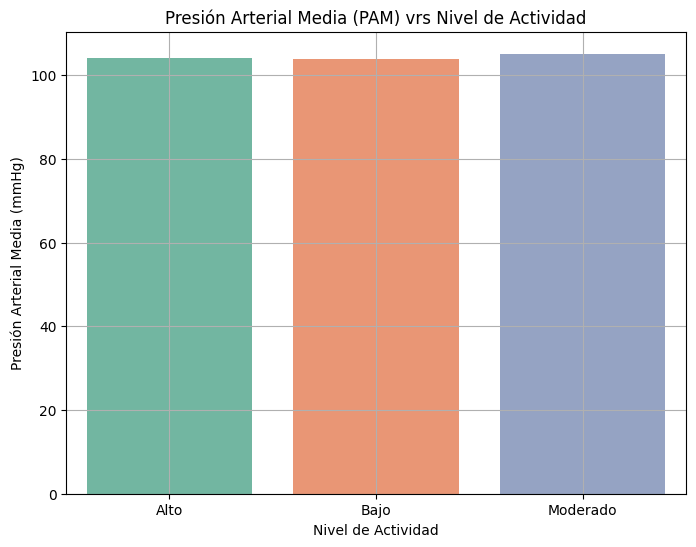

In [ ]:
# Gráfico de barras de la PAM promedio por nivel de actividad
plt.figure(figsize=(8, 6))
sns.barplot(x='Nivel_Actividad', y='PAM', data=pam_por_actividad, palette='Set2', ci=None)

plt.title('Presión Arterial Media (PAM) vrs Nivel de Actividad')
plt.xlabel('Nivel de Actividad')
plt.ylabel('Presión Arterial Media (mmHg)')
plt.grid(True)
plt.show()

# Diferencias en el número de pasos diarios entre fumadores y  no fumadores

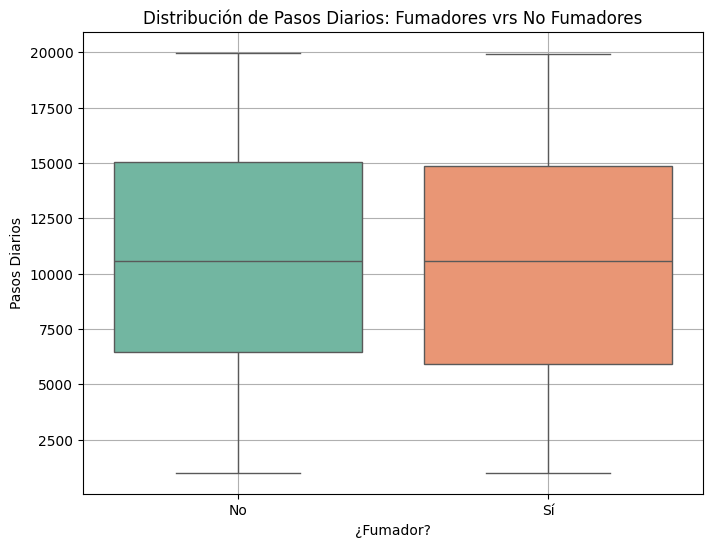

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fumador', y='Pasos_Diarios', data=df, palette='Set2')
plt.title('Distribución de Pasos Diarios: Fumadores vrs No Fumadores')
plt.xlabel('¿Fumador?')
plt.ylabel('Pasos Diarios')
plt.grid(True)
plt.show()

## Relación del número de horas sueño con la satisfacción de la vida

In [ ]:
#Se transforman los valores númericos de Satisfaccion_Vida a categorias 
#1 a 4 → "Poca satisfacción"
#5 a 6 → "Moderada satisfacción"
#7 a 9 → "Muy satisfecho"
df['Categoria_Satisfaccion'] = pd.cut(df['Satisfaccion_Vida'], 
    bins=[0, 4, 6, 9], 
     labels=['Poca satisfacción', 'Moderada satisfacción', 'Muy satisfecho'])

In [ ]:
#Cuantas personas hay por categoría
df['Categoria_Satisfaccion'].value_counts()

Categoria_Satisfaccion
Poca satisfacción        614
Muy satisfecho           344
Moderada satisfacción    241
Name: count, dtype: int64

In [ ]:
#Ver minimo y maximo en columna Horas de Sueño
min_horas = df['Horas_Sueno'].min()
max_horas = df['Horas_Sueno'].max()

In [ ]:
df

,Edad,Genero,IMC,Nivel_Actividad,Consumo_Alcohol,Fumador,Presion_Sistolica,Presion_Diastolica,Colesterol,Glucosa,Horas_Sueno,Pasos_Diarios,Satisfaccion_Vida,Categoria_Satisfaccion
0,69,Femenino,22,Moderado,Ocasional,No,167,69,Muy Alto,81,7,10583,9,Muy satisfecho
1,46,Femenino,20,Bajo,Frecuente,Sí,167,89,Normal,81,9,6079,4,Poca satisfacción
2,32,Otro,23,Moderado,Nunca,No,105,111,Alto,190,8,15341,8,Muy satisfecho
3,60,Femenino,19,Bajo,Frecuente,No,160,84,Normal,159,4,10981,6,Moderada satisfacción
4,25,Masculino,29,Bajo,Frecuente,Sí,108,113,Normal,132,5,4524,6,Moderada satisfacción
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,78,Masculino,18,Bajo,Ocasional,No,155,68,Muy Alto,112,8,8240,8,Muy satisfecho
1195,69,Masculino,29,Alto,Nunca,Sí,114,115,Normal,146,9,5942,1,Poca satisfacción
1196,32,Masculino,29,Bajo,Ocasional,No,162,82,Muy Alto,180,7,14536,5,Moderada satisfacción
1197,64,Masculino,24,Alto,Nunca,No,116,94,Muy Alto,132,4,2600,4,Poca satisfacción


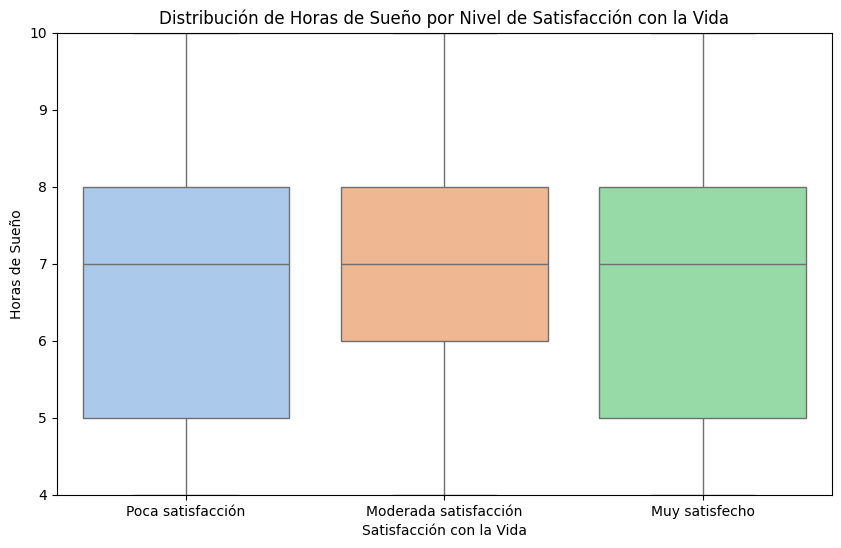

In [ ]:
plt.figure(figsize=(10, 6))
# Gráfico de Boxplot
sns.boxplot(x='Categoria_Satisfaccion', y='Horas_Sueno', data=df, palette='pastel')
# Ajustar el eje Y según el mínimo y máximo de horas de sueño
plt.ylim(df['Horas_Sueno'].min(), df['Horas_Sueno'].max())
# Etiquetas y título
plt.title('Distribución de Horas de Sueño por Nivel de Satisfacción con la Vida')
plt.xlabel('Satisfacción con la Vida')
plt.ylabel('Horas de Sueño')
# Mostrar gráfico
plt.show()

## En el Pie Chart se oberva la proporción de personas en cada nivel de satisfacción.

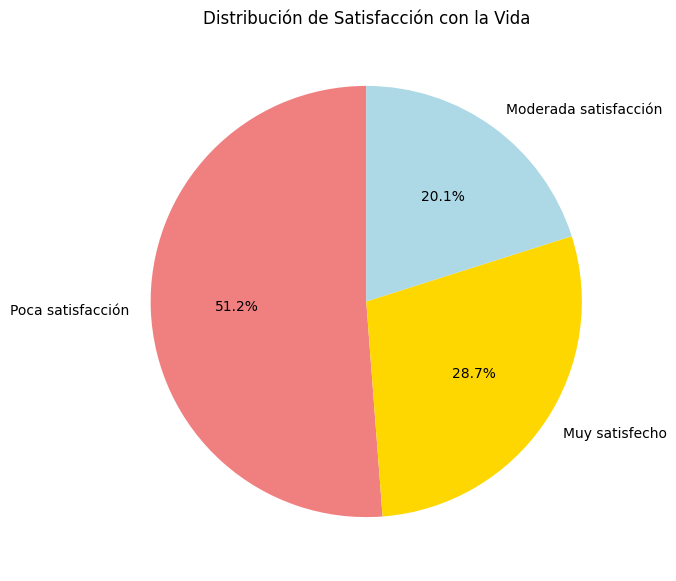

In [ ]:
import matplotlib.pyplot as plt
satisfaccion_counts = df['Categoria_Satisfaccion'].value_counts()
colors = ['lightcoral', 'gold', 'lightblue']
plt.figure(figsize=(7, 7))
plt.pie(satisfaccion_counts, labels=satisfaccion_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribución de Satisfacción con la Vida')
plt.show()

# Visualización de la relación entre el colesterol y la cantidad de pasos diarios

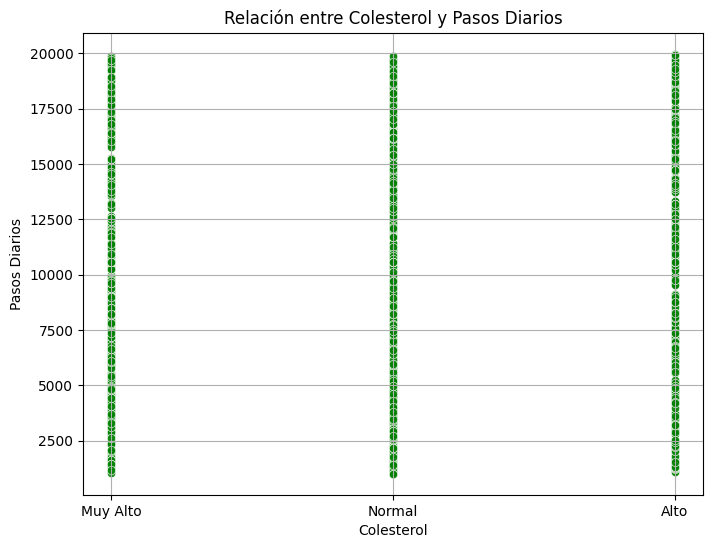

In [747]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Colesterol', y='Pasos_Diarios', data=df, color='green', alpha=0.9)
plt.title('Relación entre Colesterol y Pasos Diarios')
plt.xlabel('Colesterol')
plt.ylabel('Pasos Diarios')
plt.grid(True)
plt.show()

#No parece haber una relación entre el nivel de colesterol y cantidad de pasos. 